In [0]:
import csv
#import matplotlib as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats
%matplotlib inline

In [67]:
#Access data from Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df_data = pd.read_csv('/content/drive/My Drive/M1/Dataz2.csv')

In [0]:
df_data.drop(50)
df_data.drop(63)
df_data.rename(columns={'What is your gender ?': 'Gender', 'What culture do you most identify with ?': 'Culture','What is your age ?': 'Age', 'How romantic do you consider this situation ?': 'Clip1','How romantic do you consider this situation ?.1': 'Clip2', 'How romantic do you consider this situation ?.2': 'Clip3', 'How romantic do you consider this situation ?.3': 'Clip4', 'How romantic do you consider this situation ?.4': 'Clip5', 'How romantic do you consider this situation ?.5': 'Clip6', 'How romantic do you consider this situation ?.6': 'Clip7', 'How romantic do you consider this situation ?.7': 'Clip8', 'How romantic do you consider this situation ?.8': 'Clip9', 'How romantic do you consider this situation ?.9': 'Clip10', 'How romantic do you consider this situation ?.10': 'Clip11', 'Please tell us if you have something on your mind that you want to share with us:': 'Remarks' }, inplace=True)

In [70]:
df_data

,Timestamp,Gender,Culture,Age,Clip1,Clip2,Clip3,Clip4,Clip5,Clip6,Clip7,Clip8,Clip9,Clip10,Clip11,Remarks
0,1/3/2020 16:16:29,Male,Western Culture,21-25,3,2,4,4,1,4,5,5,4,2,3,NaN
1,1/3/2020 16:23:07,Male,Indian culture,26-30,1,1,2,1,1,1,2,4,4,1,1,please update this list of gender sterotypes.
2,1/3/2020 16:26:18,Male,Indian culture,21-25,3,3,4,3,1,4,3,2,4,2,2,NaN
3,1/3/2020 16:27:34,Female,Western Culture,16-20,2,2,3,4,1,4,3,3,2,1,2,NaN
4,1/3/2020 16:28:57,Other,Western Culture,31-35,1,4,3,5,1,5,4,5,5,3,1,this was so straight I forgot how to turn left...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1/5/2020 23:36:12,Female,Western Culture,36-40,5,2,4,5,1,3,4,4,4,2,5,NaN
68,1/5/2020 23:39:26,Male,Western Culture,21-25,1,2,5,4,1,3,3,4,3,1,1,NaN
69,1/6/2020 1:33:24,Female,Western Culture,16-20,4,2,2,4,1,3,5,5,5,2,2,NaN
70,1/6/2020 10:42:16,Female,Western Culture,21-25,1,1,3,2,1,2,5,3,4,1,2,One thing: I can find something romantic becau...


In [71]:
df_data.describe(include='all')

,Timestamp,Gender,Culture,Age,Clip1,Clip2,Clip3,Clip4,Clip5,Clip6,Clip7,Clip8,Clip9,Clip10,Clip11,Remarks
count,72,72,72,72,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,25
unique,72,4,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
top,1/5/2020 23:06:31,Female,Western Culture,21-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Romantic for me is not always dumb/naive (with...
freq,1,46,49,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,NaN,NaN,NaN,NaN,2.319444,1.916667,3.513889,3.125000,1.041667,2.708333,3.972222,3.486111,3.763889,2.111111,2.236111,NaN
std,NaN,NaN,NaN,NaN,1.136171,1.135223,1.233260,1.149862,0.262034,1.293946,1.087344,1.186699,1.027688,1.120306,1.180750,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,3.000000,3.000000,3.000000,1.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,2.000000,1.500000,4.000000,3.000000,1.000000,2.000000,4.000000,4.000000,4.000000,2.000000,2.000000,NaN
75%,NaN,NaN,NaN,NaN,3.000000,3.000000,5.000000,4.000000,1.000000,4.000000,5.000000,4.000000,5.000000,3.000000,3.000000,NaN


In [72]:
#Reformatting colums for gender
df_data["Gender"] = df_data["Gender"].replace(to_replace= "Female",value=0)
df_data["Gender"] = df_data["Gender"].replace(to_replace= "Male",value=1)
df_data["Gender"] = df_data["Gender"].replace(to_replace= "Other",value=np.nan)
df_data["Gender"] = df_data["Gender"].replace(to_replace= "Prefer not to say",value=np.nan)
#Reformatting colums for Age
df_data["Age"] = df_data["Age"].replace(to_replace= "16-20",value=1)
df_data["Age"] = df_data["Age"].replace(to_replace= "21-25",value=0)
df_data["Age"] = df_data["Age"].replace(to_replace= "26-30",value=1)
df_data["Age"] = df_data["Age"].replace(to_replace= "31-35",value=1) 
df_data["Age"] = df_data["Age"].replace(to_replace= "36-40",value=1) 
df_data["Age"] = df_data["Age"].replace(to_replace= "41-45",value=1)
#Reformatting colums for culture
df_data["Culture"] = df_data["Culture"].replace(to_replace= "Western Culture",value=0)
df_data["Culture"] = df_data["Culture"].replace(to_replace= "Hispanic / Latino culture",value=1)
df_data["Culture"] = df_data["Culture"].replace(to_replace= "Indian culture",value= 1)
df_data["Culture"] = df_data["Culture"].replace(to_replace= "Arab culture",value=1)
df_data["Culture"] = df_data["Culture"].replace(to_replace= "Russian culture",value=1)
df_data["Culture"] = df_data["Culture"].replace(to_replace= "African culture",value=1)
df_data = df_data.drop(['Timestamp','Remarks'], axis=1)
df_data

,Gender,Culture,Age,Clip1,Clip2,Clip3,Clip4,Clip5,Clip6,Clip7,Clip8,Clip9,Clip10,Clip11
0,1.0,0,0,3,2,4,4,1,4,5,5,4,2,3
1,1.0,1,1,1,1,2,1,1,1,2,4,4,1,1
2,1.0,1,0,3,3,4,3,1,4,3,2,4,2,2
3,0.0,0,1,2,2,3,4,1,4,3,3,2,1,2
4,NaN,0,1,1,4,3,5,1,5,4,5,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.0,0,1,5,2,4,5,1,3,4,4,4,2,5
68,1.0,0,0,1,2,5,4,1,3,3,4,3,1,1
69,0.0,0,1,4,2,2,4,1,3,5,5,5,2,2
70,0.0,0,0,1,1,3,2,1,2,5,3,4,1,2



*  Null: Given two sample means are equal
*  Alternate: Given two sample means are not equal



To do:

* 1) Data vis & exploration
*   Repartition of score for each clip (like in gform) -> bar plot 
* Repartition of mean & std for each clip -> bar plot with error bar 
*   Repartition of age, culture & gender (like in gform) -> camembert 
* 2) Statistical tests
*       2.1) Genral - done
*   Repartition of hist positive clip & negative clip -> hist
*   Make T test
*       2.2) Gender - done
*   Repartition of hist positive clip & negative clip -depending on gender
*   Make chi test depeing on gender
*       2.2) Age
*   Repartition of hist positive clip & negative clip -depending on age
*   Make chi test depeing on age
*       2.2) Culture
*   Repartition of hist positive clip & negative clip -depending on culture
*   Make chi test depeing on culture
* 3) Further analysis 
* If time clustering





## 2 Statistical Analysis

### 2.1 General

In [0]:
df_pos = df_data[['Clip3', 'Clip4', 'Clip7', 'Clip8', 'Clip9']]
df_neg = df_data[['Clip1', 'Clip2', 'Clip6', 'Clip10', 'Clip11']]
Data = {'PosMean': df_pos.mean(axis=1),
        'NegMean': df_neg.mean(axis=1)}
df_stat = pd.DataFrame (Data, columns = ['PosMean','NegMean'])
#df_stat = [df_pos.mean(axis=1), df_neg.mean(axis=1)]
#df_stat

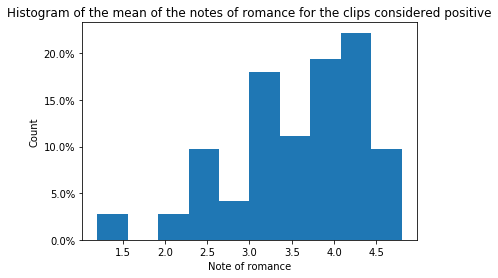

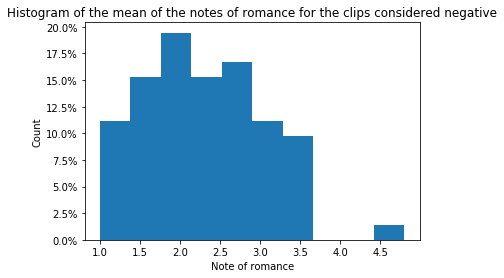

In [74]:
from matplotlib.ticker import PercentFormatter

plt.hist(df_stat['PosMean'],  weights=np.ones(len(df_stat['PosMean'])) / len(df_stat['PosMean']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Note of romance')
plt.ylabel('Count')
plt.title('Histogram of the mean of the notes of romance for the clips considered positive')
plt.show()

plt.hist(df_stat['NegMean'],  weights=np.ones(len(df_stat['NegMean'])) / len(df_stat['NegMean']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Note of romance')
plt.ylabel('Count')
plt.title('Histogram of the mean of the notes of romance for the clips considered negative')
plt.show()

Text(0.5, 1.0, 'Positive clips and negative clips P-P Plot')

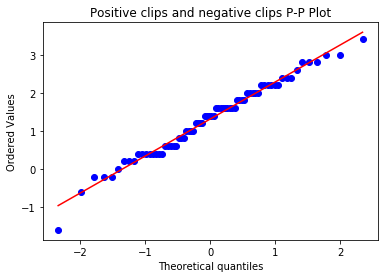

In [75]:
#Test for normality distribution
diff = df_stat['PosMean'] - df_stat['NegMean']
stats.probplot(diff, plot= plt)
plt.title('Positive clips and negative clips P-P Plot') 

In [76]:
#import researchpy as rp
from scipy import stats
stats.ttest_ind(df_stat['PosMean'], df_stat['NegMean'])

Ttest_indResult(statistic=9.87704663786197, pvalue=7.769395757012295e-18)

=> There is a statistical difference between the two groups since p< 0.05, 0.01 and  0.001

In [0]:
### 2.2 Gender

### 2.2 Gender

In [0]:
df_dataG = df_data[['Gender', 'Clip1', 'Clip2', 'Clip3', 'Clip4', 'Clip5', 'Clip6', 'Clip7', 'Clip8', 'Clip9', 'Clip10', 'Clip11']]
df_dataG = df_dataG.dropna()
#df_dataG
df_f = df_dataG[df_dataG['Gender'] <= 0.0]
#df_f
df_m = df_dataG[df_dataG['Gender'] >= 1.0]
#df_m

Females DataFrame

In [0]:
df_pos = df_f[['Clip3', 'Clip4', 'Clip7', 'Clip8', 'Clip9']]
df_neg = df_f[['Clip1', 'Clip2', 'Clip6', 'Clip10', 'Clip11']]
Data = {'PosMean': df_pos.mean(axis=1),
        'NegMean': df_neg.mean(axis=1)}
df_Fstat = pd.DataFrame (Data, columns = ['PosMean','NegMean'])
#df_Fstat

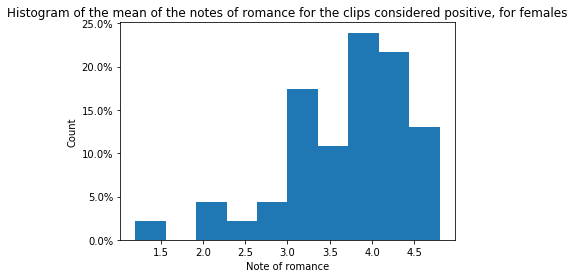

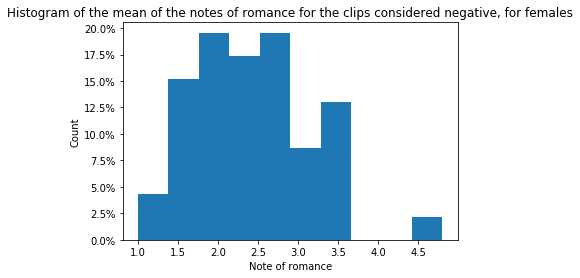

In [80]:
plt.hist(df_Fstat['PosMean'],  weights=np.ones(len(df_Fstat['PosMean'])) / len(df_Fstat['PosMean']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Note of romance')
plt.ylabel('Count')
plt.title('Histogram of the mean of the notes of romance for the clips considered positive, for females')
plt.show()

plt.hist(df_Fstat['NegMean'],  weights=np.ones(len(df_Fstat['NegMean'])) / len(df_Fstat['NegMean']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Note of romance')
plt.ylabel('Count')
plt.title('Histogram of the mean of the notes of romance for the clips considered negative, for females')
plt.show()

Text(0.5, 1.0, 'Positive clips and negative clips P-P Plot')

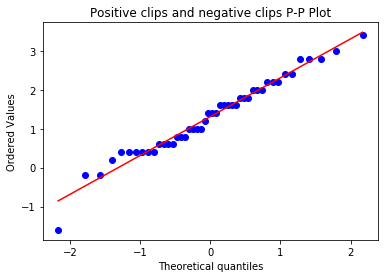

In [81]:
#Test for normality distribution
diff = df_Fstat['PosMean'] - df_Fstat['NegMean']
stats.probplot(diff, plot= plt)
plt.title('Positive clips and negative clips P-P Plot') 

In [82]:
stats.ttest_ind(df_Fstat['PosMean'], df_Fstat['NegMean'])

Ttest_indResult(statistic=8.074366040841497, pvalue=2.8642852408987044e-12)

Males dataframe

In [0]:
df_pos = df_m[['Clip3', 'Clip4', 'Clip7', 'Clip8', 'Clip9']]
df_neg = df_m[['Clip1', 'Clip2', 'Clip6', 'Clip10', 'Clip11']]
Data = {'PosMean': df_pos.mean(axis=1),
        'NegMean': df_neg.mean(axis=1)}
df_Mstat = pd.DataFrame (Data, columns = ['PosMean','NegMean'])
#df_Mstat

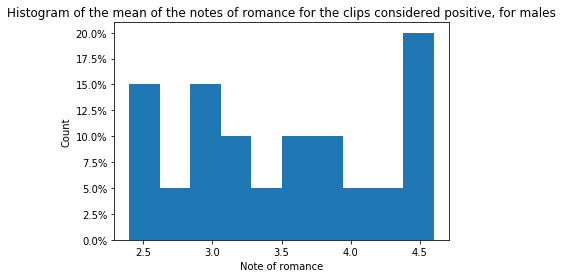

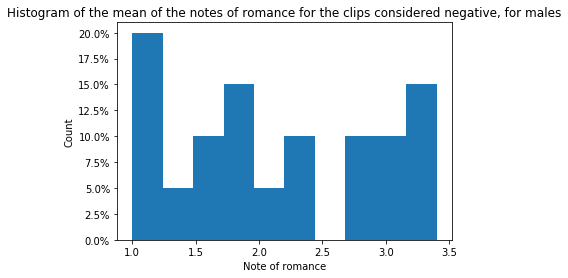

In [84]:
plt.hist(df_Mstat['PosMean'],  weights=np.ones(len(df_Mstat['PosMean'])) / len(df_Mstat['PosMean']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Note of romance')
plt.ylabel('Count')
plt.title('Histogram of the mean of the notes of romance for the clips considered positive, for males')
plt.show()

plt.hist(df_Mstat['NegMean'],  weights=np.ones(len(df_Mstat['NegMean'])) / len(df_Mstat['NegMean']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Note of romance')
plt.ylabel('Count')
plt.title('Histogram of the mean of the notes of romance for the clips considered negative, for males')
plt.show()

Text(0.5, 1.0, 'Positive clips and negative clips P-P Plot')

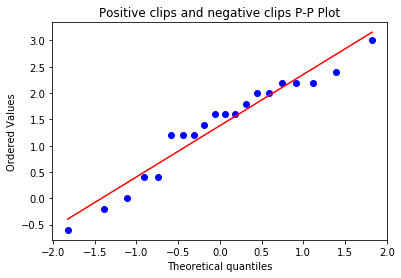

In [85]:
#Test for normality distribution
diff = df_Mstat['PosMean'] - df_Mstat['NegMean']
stats.probplot(diff, plot= plt)
plt.title('Positive clips and negative clips P-P Plot') 

In [86]:
stats.ttest_ind(df_Mstat['PosMean'], df_Mstat['NegMean'])

Ttest_indResult(statistic=5.8770331716218545, pvalue=8.395338890421151e-07)

In [87]:
stats.ttest_ind(df_Fstat['PosMean'], df_Mstat['PosMean'])

Ttest_indResult(statistic=0.9264177346350437, pvalue=0.3577093403305769)

In [88]:
stats.ttest_ind(df_Fstat['NegMean'], df_Mstat['NegMean'])

Ttest_indResult(statistic=1.208830923390015, pvalue=0.23117495745863012)

In [89]:
df_Fstat.mean()

PosMean    3.686957
NegMean    2.373913
dtype: float64

In [90]:
df_Mstat.mean()

PosMean    3.50
NegMean    2.12
dtype: float64

In [91]:
print(len(df_Fstat))
print(len(df_Mstat))

46
20


### 2.2 Culture

In [0]:
df_dataG = df_data[['Culture', 'Clip1', 'Clip2', 'Clip3', 'Clip4', 'Clip5', 'Clip6', 'Clip7', 'Clip8', 'Clip9', 'Clip10', 'Clip11']]
df_dataG = df_dataG.dropna()
#df_dataG
df_f = df_dataG[df_dataG['Culture'] == 0.0]
#df_f
df_m = df_dataG[df_dataG['Culture'] == 1.0]
#df_m

Western Culture

In [0]:
df_pos = df_f[['Clip3', 'Clip4', 'Clip7', 'Clip8', 'Clip9']]
df_neg = df_f[['Clip1', 'Clip2', 'Clip6', 'Clip10', 'Clip11']]
Data = {'PosMean': df_pos.mean(axis=1),
        'NegMean': df_neg.mean(axis=1)}
df_Fstat = pd.DataFrame (Data, columns = ['PosMean','NegMean'])
#df_Fstat

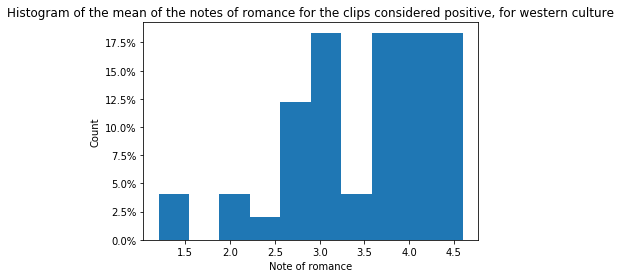

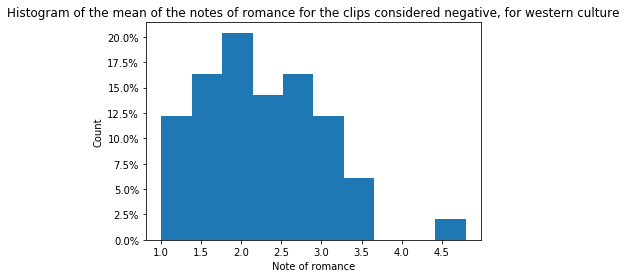

In [94]:
plt.hist(df_Fstat['PosMean'],  weights=np.ones(len(df_Fstat['PosMean'])) / len(df_Fstat['PosMean']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Note of romance')
plt.ylabel('Count')
plt.title('Histogram of the mean of the notes of romance for the clips considered positive, for western culture')
plt.show()

plt.hist(df_Fstat['NegMean'],  weights=np.ones(len(df_Fstat['NegMean'])) / len(df_Fstat['NegMean']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Note of romance')
plt.ylabel('Count')
plt.title('Histogram of the mean of the notes of romance for the clips considered negative, for western culture')
plt.show()

Text(0.5, 1.0, 'Positive clips and negative clips P-P Plot')

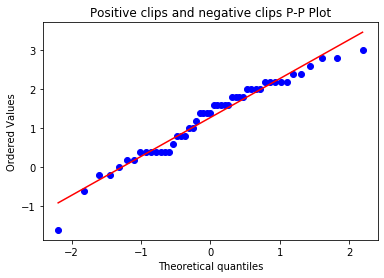

In [95]:
#Test for normality distribution
diff = df_Fstat['PosMean'] - df_Fstat['NegMean']
stats.probplot(diff, plot= plt)
plt.title('Positive clips and negative clips P-P Plot') 

In [96]:
stats.ttest_ind(df_Fstat['PosMean'], df_Fstat['NegMean'])

Ttest_indResult(statistic=7.680355297852728, pvalue=1.3403900867887923e-11)

Other Culture data frame

In [0]:
df_pos = df_m[['Clip3', 'Clip4', 'Clip7', 'Clip8', 'Clip9']]
df_neg = df_m[['Clip1', 'Clip2', 'Clip6', 'Clip10', 'Clip11']]
Data = {'PosMean': df_pos.mean(axis=1),
        'NegMean': df_neg.mean(axis=1)}
df_Mstat = pd.DataFrame (Data, columns = ['PosMean','NegMean'])
#df_Mstat

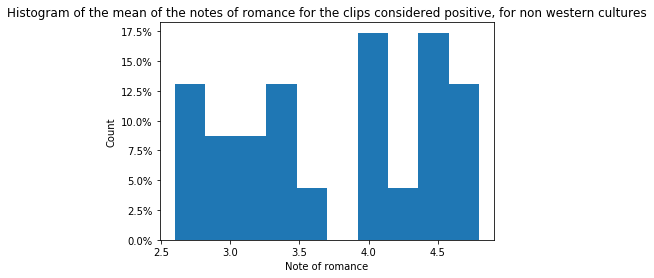

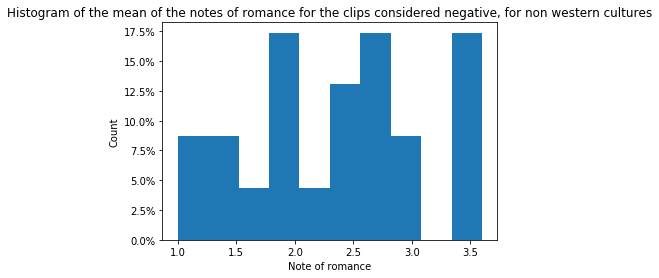

In [98]:
plt.hist(df_Mstat['PosMean'],  weights=np.ones(len(df_Mstat['PosMean'])) / len(df_Mstat['PosMean']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Note of romance')
plt.ylabel('Count')
plt.title('Histogram of the mean of the notes of romance for the clips considered positive, for non western cultures')
plt.show()

plt.hist(df_Mstat['NegMean'],  weights=np.ones(len(df_Mstat['NegMean'])) / len(df_Mstat['NegMean']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Note of romance')
plt.ylabel('Count')
plt.title('Histogram of the mean of the notes of romance for the clips considered negative, for non western cultures')
plt.show()

Text(0.5, 1.0, 'Positive clips and negative clips P-P Plot')

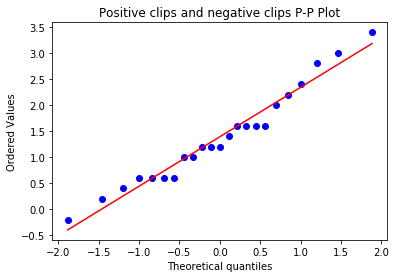

In [99]:
#Test for normality distribution
diff = df_Mstat['PosMean'] - df_Mstat['NegMean']
stats.probplot(diff, plot= plt)
plt.title('Positive clips and negative clips P-P Plot') 

In [100]:
stats.ttest_ind(df_Fstat['PosMean'], df_Fstat['NegMean'])

Ttest_indResult(statistic=7.680355297852728, pvalue=1.3403900867887923e-11)

In [101]:
stats.ttest_ind(df_Fstat['PosMean'], df_Mstat['PosMean'])

Ttest_indResult(statistic=-1.2656329918289522, pvalue=0.2098409040628675)

In [102]:
stats.ttest_ind(df_Fstat['NegMean'], df_Mstat['NegMean'])

Ttest_indResult(statistic=-0.7236880310595774, pvalue=0.47166884640353524)

In [103]:
df_Fstat.mean()

PosMean    3.489796
NegMean    2.212245
dtype: float64

In [104]:
df_Mstat.mean()

PosMean    3.747826
NegMean    2.356522
dtype: float64

In [105]:
print(len(df_Fstat))
print(len(df_Mstat))

49
23


### 2.3 Age

In [0]:
df_dataG = df_data[['Age', 'Clip1', 'Clip2', 'Clip3', 'Clip4', 'Clip5', 'Clip6', 'Clip7', 'Clip8', 'Clip9', 'Clip10', 'Clip11']]
df_dataG = df_dataG.dropna()
#df_dataG
df_f = df_dataG[df_dataG['Age'] == 0.0]
#df_f
df_m = df_dataG[df_dataG['Age'] == 1.0]
#df_m

Age 21-25

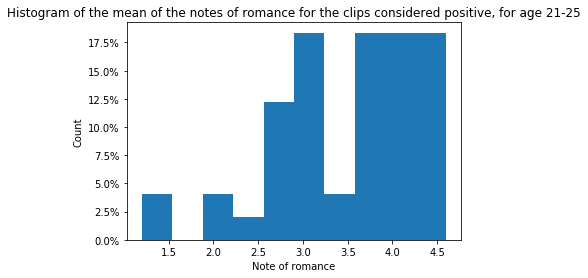

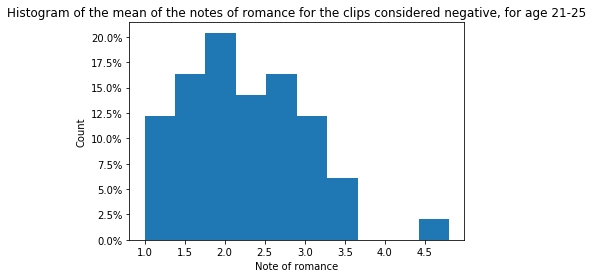

In [107]:
plt.hist(df_Fstat['PosMean'],  weights=np.ones(len(df_Fstat['PosMean'])) / len(df_Fstat['PosMean']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Note of romance')
plt.ylabel('Count')
plt.title('Histogram of the mean of the notes of romance for the clips considered positive, for age 21-25')
plt.show()

plt.hist(df_Fstat['NegMean'],  weights=np.ones(len(df_Fstat['NegMean'])) / len(df_Fstat['NegMean']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Note of romance')
plt.ylabel('Count')
plt.title('Histogram of the mean of the notes of romance for the clips considered negative, for age 21-25')
plt.show()

Text(0.5, 1.0, 'Positive clips and negative clips P-P Plot')

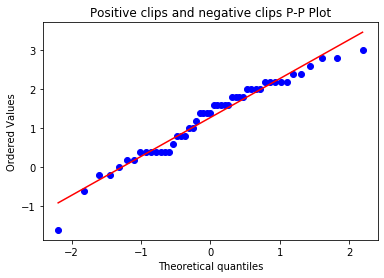

In [108]:
#Test for normality distribution
diff = df_Fstat['PosMean'] - df_Fstat['NegMean']
stats.probplot(diff, plot= plt)
plt.title('Positive clips and negative clips P-P Plot') 

In [109]:
stats.ttest_ind(df_Fstat['PosMean'], df_Fstat['NegMean'])

Ttest_indResult(statistic=7.680355297852728, pvalue=1.3403900867887923e-11)

Other Age data frame

In [0]:
df_pos = df_m[['Clip3', 'Clip4', 'Clip7', 'Clip8', 'Clip9']]
df_neg = df_m[['Clip1', 'Clip2', 'Clip6', 'Clip10', 'Clip11']]
Data = {'PosMean': df_pos.mean(axis=1),
        'NegMean': df_neg.mean(axis=1)}
df_Mstat = pd.DataFrame (Data, columns = ['PosMean','NegMean'])
#df_Mstat

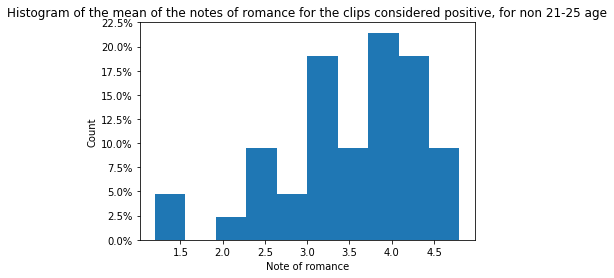

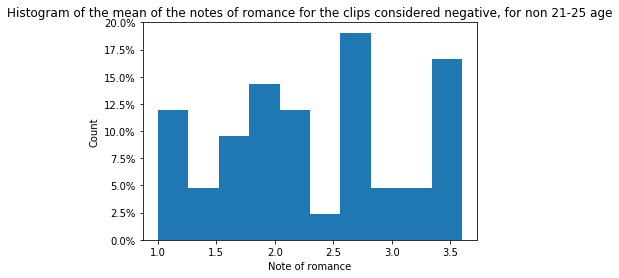

In [111]:
plt.hist(df_Mstat['PosMean'],  weights=np.ones(len(df_Mstat['PosMean'])) / len(df_Mstat['PosMean']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Note of romance')
plt.ylabel('Count')
plt.title('Histogram of the mean of the notes of romance for the clips considered positive, for non 21-25 age')
plt.show()

plt.hist(df_Mstat['NegMean'],  weights=np.ones(len(df_Mstat['NegMean'])) / len(df_Mstat['NegMean']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Note of romance')
plt.ylabel('Count')
plt.title('Histogram of the mean of the notes of romance for the clips considered negative, for non 21-25 age')
plt.show()

Text(0.5, 1.0, 'Positive clips and negative clips P-P Plot')

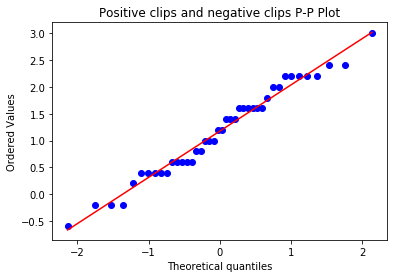

In [112]:
#Test for normality distribution
diff = df_Mstat['PosMean'] - df_Mstat['NegMean']
stats.probplot(diff, plot= plt)
plt.title('Positive clips and negative clips P-P Plot') 

In [113]:
stats.ttest_ind(df_Mstat['PosMean'], df_Mstat['NegMean'])

Ttest_indResult(statistic=6.5173612156377825, pvalue=5.4395378602390775e-09)

In [114]:
stats.ttest_ind(df_Fstat['PosMean'], df_Mstat['PosMean'])

Ttest_indResult(statistic=-0.08293465604016823, pvalue=0.934089743740598)

In [115]:
stats.ttest_ind(df_Fstat['NegMean'], df_Mstat['NegMean'])

Ttest_indResult(statistic=-0.699788256228474, pvalue=0.48588465462737185)

In [116]:
df_Fstat.mean()

PosMean    3.489796
NegMean    2.212245
dtype: float64

In [117]:
df_Mstat.mean()

PosMean    3.504762
NegMean    2.328571
dtype: float64

In [118]:
print(len(df_Fstat))
print(len(df_Mstat))

49
42


## 3. Clustering

In [0]:
from sklearn.cluster import KMeans

def get_clusters():
  df_model_full = df_data.copy()
  del df_model_full['Age']
  del df_model_full['Clip5']
  del df_model_full['Gender']
  del df_model_full['Culture']
  df_model = df_model_full.dropna()
  mean = list(df_model.mean())
  std = list(df_model.std())
  df_model = df_model.T
  km = KMeans(n_clusters=2)
  results_km = km.fit_predict(df_model)
  print('Number of rows: {}'.format(len(results_km)))
  print(results_km)
  name = ['Sleeping Beauty', 'Anime', 'Crazy rich asians', 'Hunger games', 'Twilight', 'Frozen', 'Valerian', 'spiderman', 'kdrama', 'james bond']
  Data = {'Clusters': results_km, 'Mean Romance': mean, 'Std Romance': std, 'Name':name}
  df_stat = pd.DataFrame (Data, columns = ['Clusters','Mean Romance', 'Std Romance', 'Name'])
  return df_stat
    


In [120]:
df_clus = get_clusters()
df_clus

Number of rows: 10
[0 0 1 1 0 1 1 1 0 0]


,Clusters,Mean Romance,Std Romance,Name
0,0,2.319444,1.136171,Sleeping Beauty
1,0,1.916667,1.135223,Anime
2,1,3.513889,1.233260,Crazy rich asians
3,1,3.125000,1.149862,Hunger games
4,0,2.708333,1.293946,Twilight
5,1,3.972222,1.087344,Frozen
6,1,3.486111,1.186699,Valerian
7,1,3.763889,1.027688,spiderman
8,0,2.111111,1.120306,kdrama
9,0,2.236111,1.180750,james bond


In [0]:
  df_model_full = df_data.copy()
  del df_model_full['Age']
  del df_model_full['Clip5']
  del df_model_full['Gender']
  del df_model_full['Culture']
  df_model = df_model_full.dropna()
  mean = list(df_model.mean())
  std = list(df_model.std())

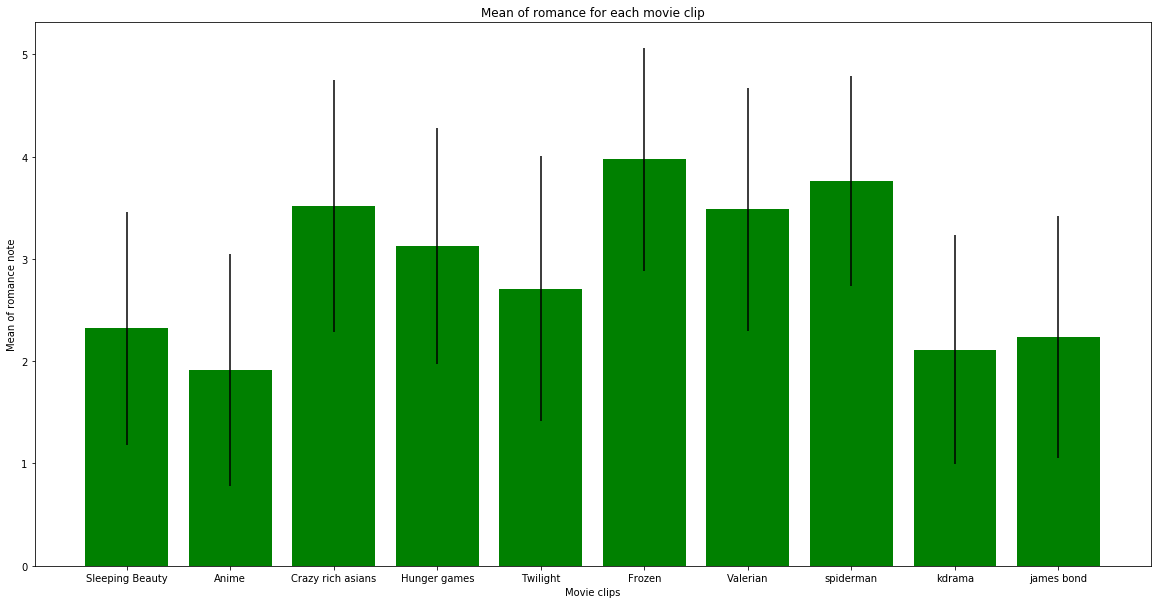

In [134]:
x = ['Sleeping Beauty', 'Anime', 'Crazy rich asians', 'Hunger games', 'Twilight', 'Frozen', 'Valerian', 'spiderman', 'kdrama', 'james bond']
energy = list(mean)
variance = list(std)

x_pos = [i for i, _ in enumerate(x)]
#from pylab import rcParams
#rcParams['figure.figsize'] = 5, 10

plt.figure(figsize=(20,10))

plt.bar(x_pos, energy, color='green', yerr=variance)
#plt.figure(figsize=(20,10))
plt.xlabel("Movie clips")
plt.ylabel("Mean of romance note")
plt.title("Mean of romance for each movie clip")

plt.xticks(x_pos, x)

plt.show()